In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sympy as smp
from skimage import color
from skimage import io
from scipy.fft import fftfreq
from scipy.fft import fft, ifft, fft2, ifft2

# Diferentes Tipos de Transformadas de Fourier

## 1. Transformada de Fourier (Tempo e Frequência Continuo)

In [2]:
t, f = smp.symbols('t, f', real=True)

In [3]:
t, f = smp.symbols('t, f', real=True)
k = smp.symbols('k', real=True, positive=True)
x = smp.exp(-k * t**2) * k * t
x

k*t*exp(-k*t**2)

In [4]:
from sympy.integrals.transforms import fourier_transform

In [5]:
x_FT = fourier_transform(x, t, f)
x_FT

-I*pi**(3/2)*f*exp(-pi**2*f**2/k)/sqrt(k)

### Resolvendo Numéricamente

In [6]:
#Won't run
#x = smp.exp(-k * t**2) * smp.sin(k*t) * t**4
#fourier_transform(x, t, f)

In [7]:
def x(t, k):
    return np.exp(-k * t**2) * np.sin(k*t) * t**4

def get_x_FT(x, f, k):
    x_FT_integrand_real = lambda t: np.real(x(t, k)*np.exp(-2*np.pi*1j*f*t))
    x_FT_integrand_comp = lambda t: np.imag(x(t, k)*np.exp(-2*np.pi*1j*f*t))
    x_FT_real = quad(x_FT_integrand_real, -np.inf, np.inf)[0]
    x_FT_comp = quad(x_FT_integrand_comp, -np.inf, np.inf)[0]
    return x_FT_real + 1j*x_FT_comp

In [44]:
f = np.linspace(-4, 4, 100)
x_FT = np.vectorize(get_x_FT)(x, f, k=2)

NameError: name 'quad' is not defined

TypeError: can't convert expression to float

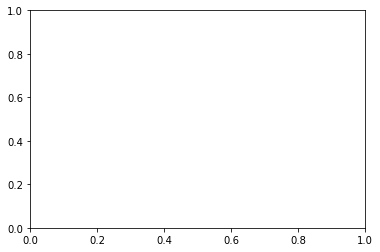

In [8]:
plt.plot(f, np.abs(x_FT))
plt.ylabel('$|\hat{x}(f)|$', fontsize=20)
plt.xlabel('$f$', fontsize=20)

## Série de Fourier (Tempo Continuo, Frequência Discreta)

In [14]:
# Consider now only between t=0 to t=1
t = smp.symbols('t', real=True)
k, n, T = smp.symbols('k, n, T', real=True, positive=True)
fn = n/T
x = smp.exp(-k * t)
x

exp(-k*t)

In [10]:
x_FT = smp.integrate(1/T * x*smp.exp(-2*smp.pi*smp.I*fn*t), (t, 0, T)).simplify()
x_FT

(1 - exp(-T*k - 2*I*pi*n))/(T*k + 2*I*pi*n)

In [11]:
smp.Abs(x_FT).simplify()

sqrt(-exp(-T*k - 2*I*pi*n) - exp(-T*k + 2*I*pi*n) + 1 + exp(-2*T*k))/sqrt(T**2*k**2 + 4*pi**2*n**2)

In [12]:
get_FT = smp.lambdify([k, T, n], x_FT)
ns = np.arange(0, 20, 1)
xFT = get_FT(k=1, T=4, n=ns)

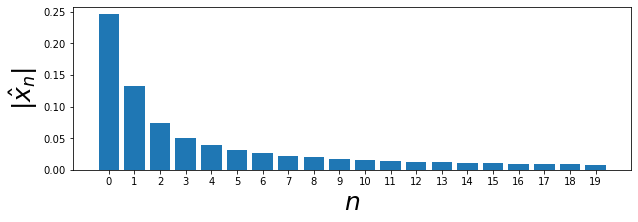

In [13]:
plt.figure(figsize=(10,3))
plt.bar(ns, np.abs(xFT))
plt.xticks(ns)
plt.ylabel('$|\hat{x}_n|$', fontsize=25)
plt.xlabel('$n$', fontsize=25)
plt.show()